In [1]:
from EDA import *
from Data_Preprocessing import *
from Models import *
from Evaluation import *

# Data Preprocessing

In [2]:
df = load_data('Dataset/Tasla_Stock_Updated_V2.csv')

In [3]:
df_train, df_test = split_data(df)

In [4]:
df_train=create_features(df_train)
df_test=create_features(df_test)

In [5]:
df_full = create_features(df)


In [6]:
features_to_scale = ['Low','High','Open','Close','Volume' ,'Monthly_Return', 'MA5', 'MA10', 'MA20','Volatility_5','Volatility_10','Volatility_20','Target']
df_train_scaled, df_test_scaled, fitted_scaler = scale_features(df_train, df_test, features_to_scale)
print("example of scaled data")
print(df_test_scaled.head())

example of scaled data
            Unnamed: 0      Open      High       Low     Close    Volume  \
Date                                                                       
2022-04-21        1838  0.867589  0.875241  0.814450  0.815905  0.104926   
2022-04-22        1839  0.817985  0.827925  0.812414  0.812800  0.065389   
2022-04-25        1840  0.788183  0.806292  0.796684  0.806948  0.063889   
2022-04-26        1841  0.801832  0.799183  0.712313  0.705713  0.138925   
2022-04-27        1842  0.721522  0.731554  0.714298  0.709951  0.073425   

            Monthly_Return       MA5      MA10      MA20  Volatility_5  \
Date                                                                     
2022-04-21        0.593161  0.823160  0.872942  0.928009      0.217445   
2022-04-22        0.505230  0.826560  0.868272  0.927601      0.195730   
2022-04-25        0.497180  0.825497  0.865815  0.927019      0.198433   
2022-04-26        0.216777  0.799772  0.856914  0.917098      0.599414   


# EDA

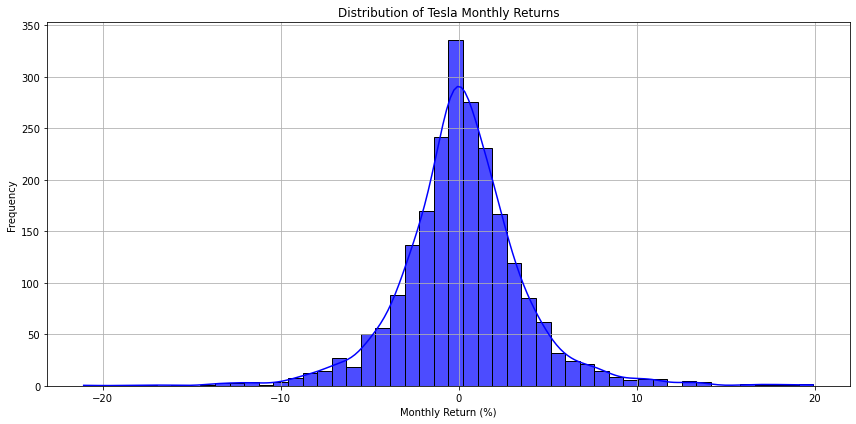

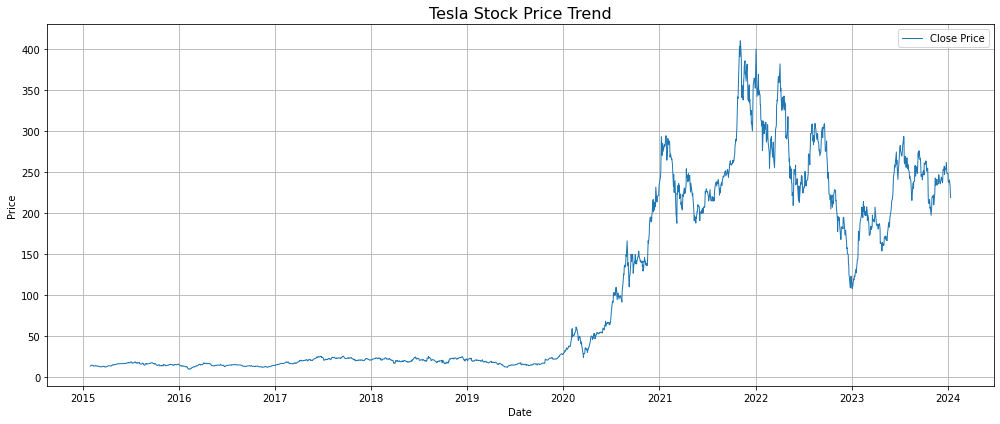

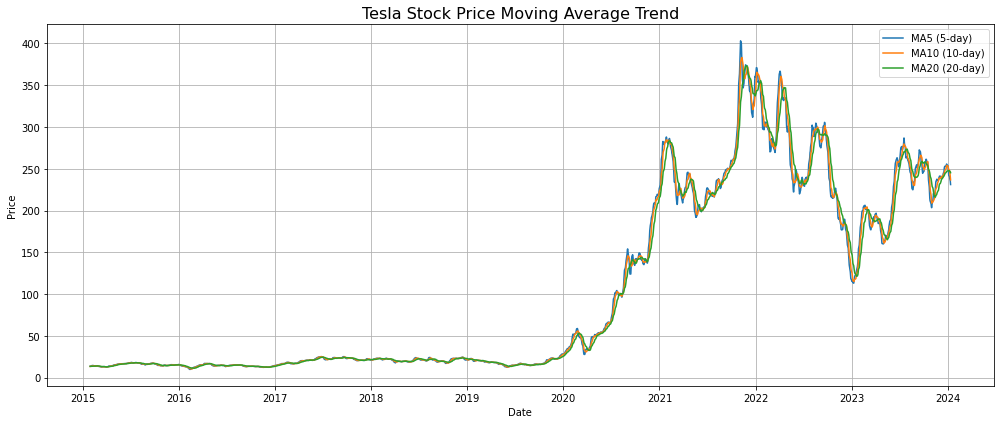

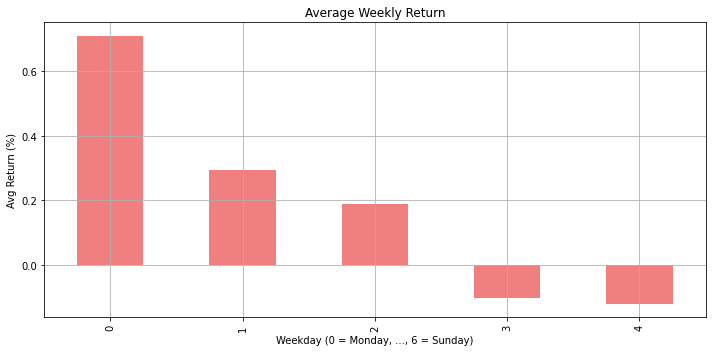

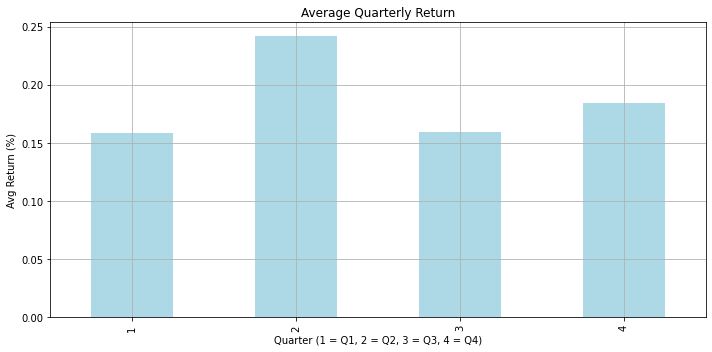

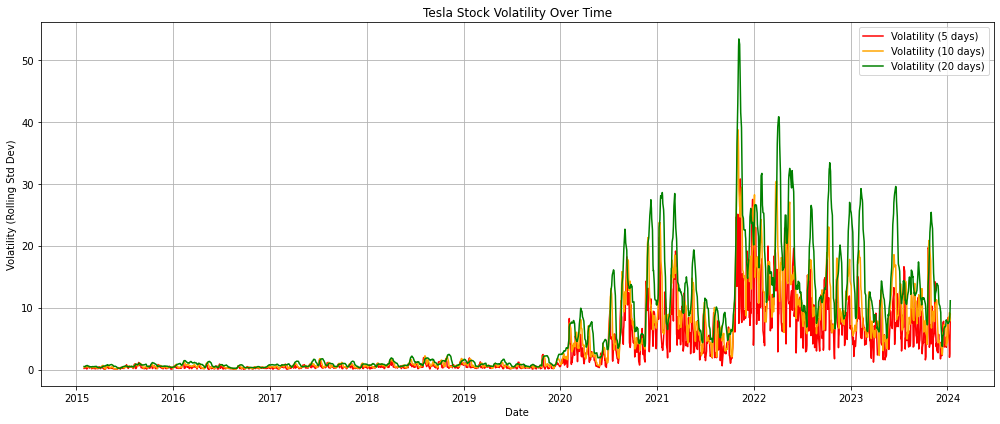

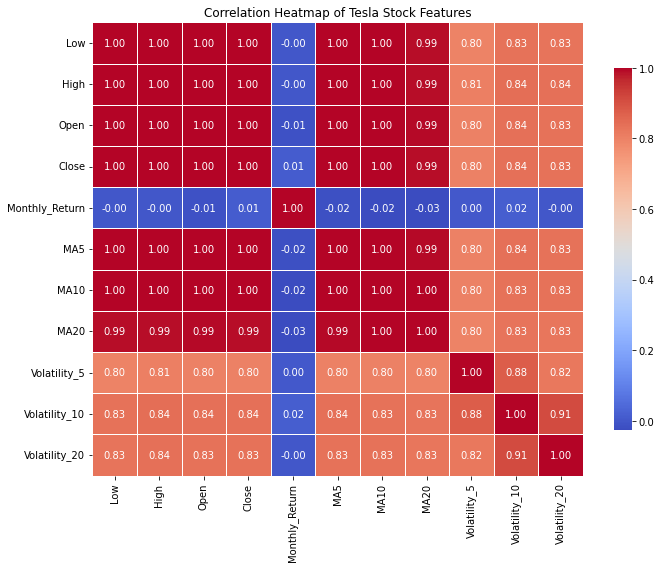

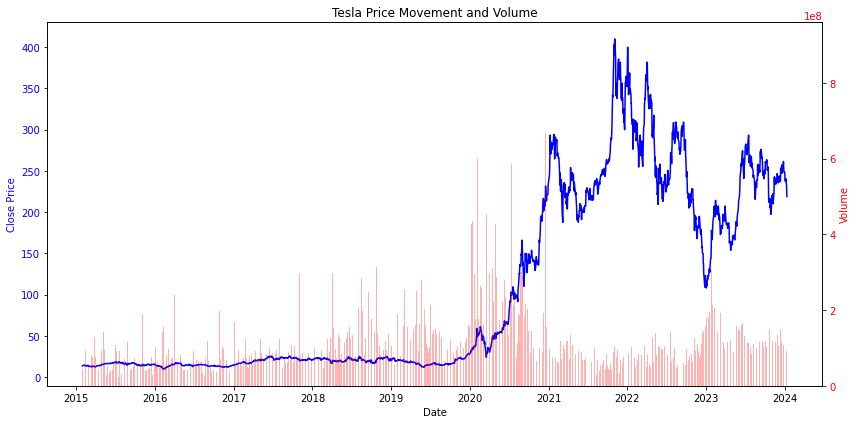

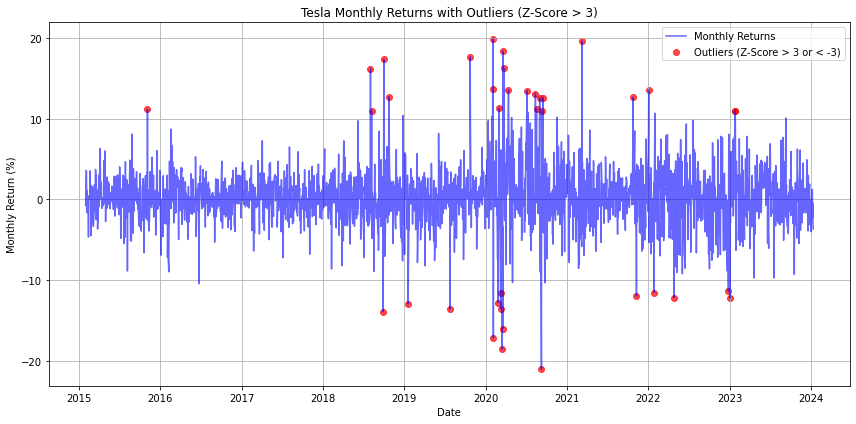

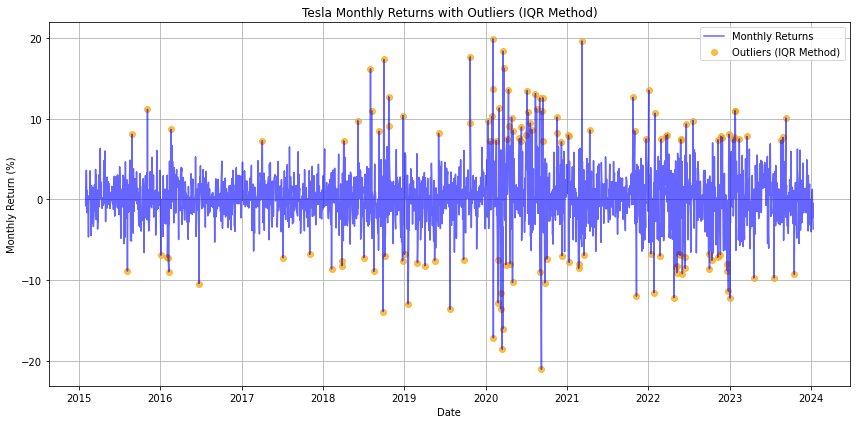

Sharpe Ratio: 0.0519


/Users/rakibabdullah/Desktop/Tesla-S/EDA.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative_Return'] = (1 + df['Daily_Return'] / 100).cumprod() - 1
/Users/rakibabdullah/Desktop/Tesla-S/EDA.py:155: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').last()


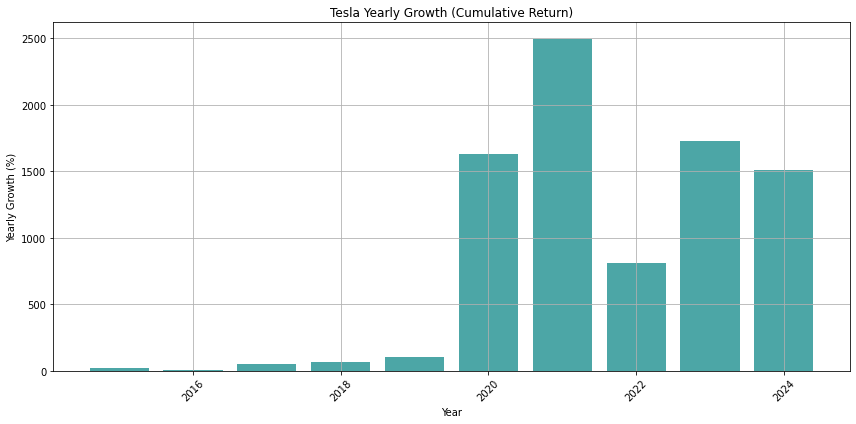

In [7]:
plot_monthly_return_distribution(df_full)
plot_stock_price_trend(df_full)
plot_moving_averages(df_full)
plot_weekly_avg_return(df_full)
plot_quarterly_seasonality(df_full)
plot_volatility(df_full)
plot_correlation_heatmap(df_full)
plot_volume_vs_price(df_full)
plot_zscore_outliers(df_full)
plot_iqr_outliers(df_full)
calculate_sharpe_ratio(df_full)
plot_cumulative_returns(df_full)



# Model Tranining an Testing

### SMA

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0123
Mean Squared Error (MSE): 0.0002
Root Mean Squared Error (RMSE): 0.0157
R-squared (R²): 0.9807
Mean Absolute Percentage Error (MAPE): 2.3518%




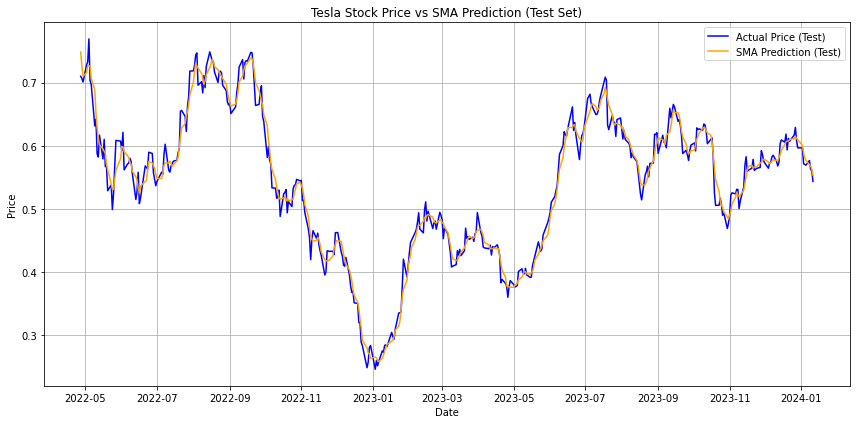

In [8]:
# Apply Simple Moving Average (SMA) to the test set
df_test_scaled['SMA_Prediction'] = simple_moving_average_model(df_test_scaled, window=5)

df_test_scaled.dropna(inplace=True)

evaluate_model(df_test_scaled['Close'], df_test_scaled['SMA_Prediction'])
plot_simple_moving_average(df_test_scaled)

### Linear Regression

In [9]:
y_test, y_pred = linear_regression_model(df_train_scaled, df_test_scaled)

evaluate_model(y_test, y_pred)  

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0153
Mean Squared Error (MSE): 0.0004
Root Mean Squared Error (RMSE): 0.0204
R-squared (R²): 0.9674
Mean Absolute Percentage Error (MAPE): 2.9296%




In [10]:
import sys
print(sys.executable)
print(sys.version)


/usr/local/bin/python3
3.10.0 (v3.10.0:b494f5935c, Oct  4 2021, 14:59:19) [Clang 12.0.5 (clang-1205.0.22.11)]


In [11]:
from EDA import *
from Data_Preprocessing import *
from Models import *
from Evaluation import *

# Data Preprocessing

In [12]:
df = load_data('Dataset/Tasla_Stock_Updated_V2.csv')

In [13]:
df_train, df_test = split_data(df)

In [14]:
df_train=create_features(df_train)
df_test=create_features(df_test)

In [15]:
df_full = create_features(df)


In [16]:
features_to_scale = ['Low','High','Open','Close','Volume' ,'Monthly_Return', 'MA5', 'MA10', 'MA20','Volatility_5','Volatility_10','Volatility_20','Target']
df_train_scaled, df_test_scaled, fitted_scaler = scale_features(df_train, df_test, features_to_scale)
print("example of scaled data")
print(df_test_scaled.head())

example of scaled data
            Unnamed: 0      Open      High       Low     Close    Volume  \
Date                                                                       
2022-04-21        1838  0.867589  0.875241  0.814450  0.815905  0.104926   
2022-04-22        1839  0.817985  0.827925  0.812414  0.812800  0.065389   
2022-04-25        1840  0.788183  0.806292  0.796684  0.806948  0.063889   
2022-04-26        1841  0.801832  0.799183  0.712313  0.705713  0.138925   
2022-04-27        1842  0.721522  0.731554  0.714298  0.709951  0.073425   

            Monthly_Return       MA5      MA10      MA20  Volatility_5  \
Date                                                                     
2022-04-21        0.593161  0.823160  0.872942  0.928009      0.217445   
2022-04-22        0.505230  0.826560  0.868272  0.927601      0.195730   
2022-04-25        0.497180  0.825497  0.865815  0.927019      0.198433   
2022-04-26        0.216777  0.799772  0.856914  0.917098      0.599414   


# EDA

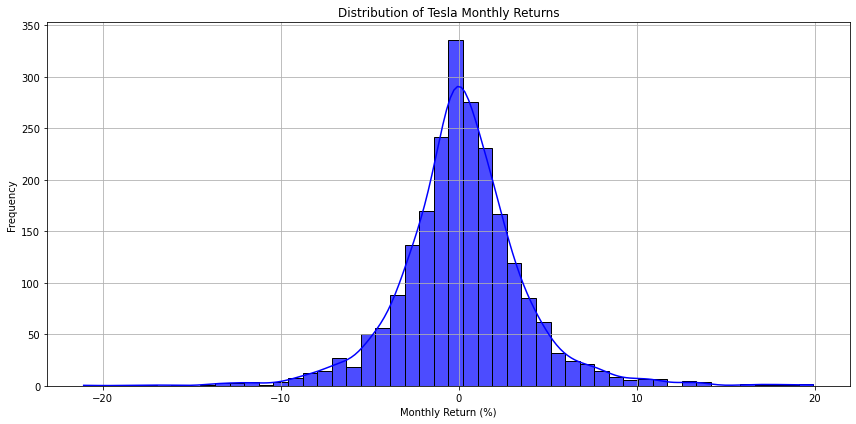

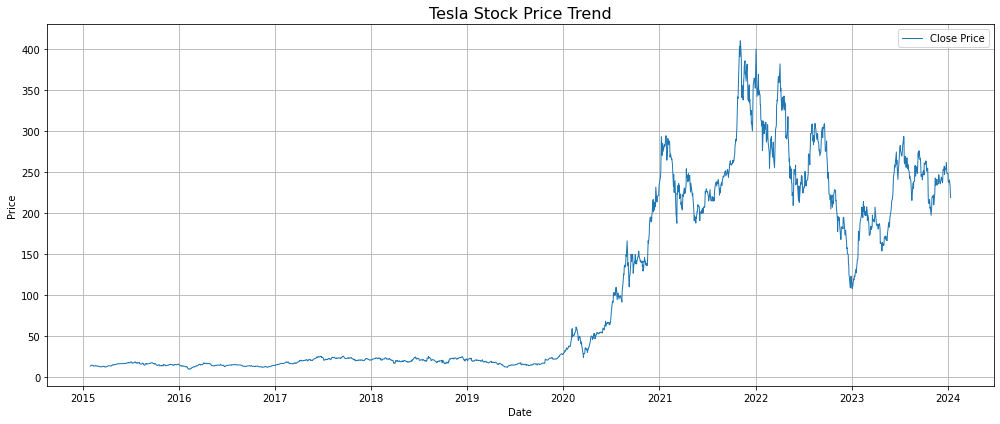

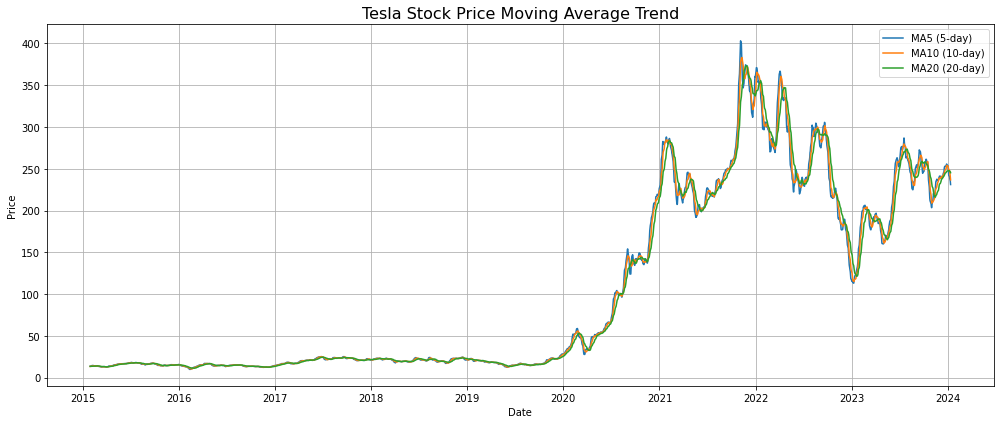

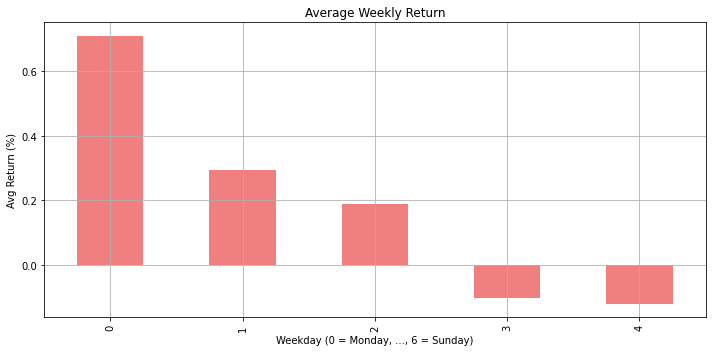

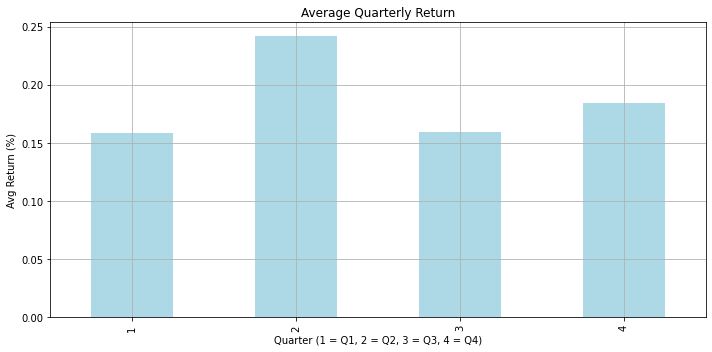

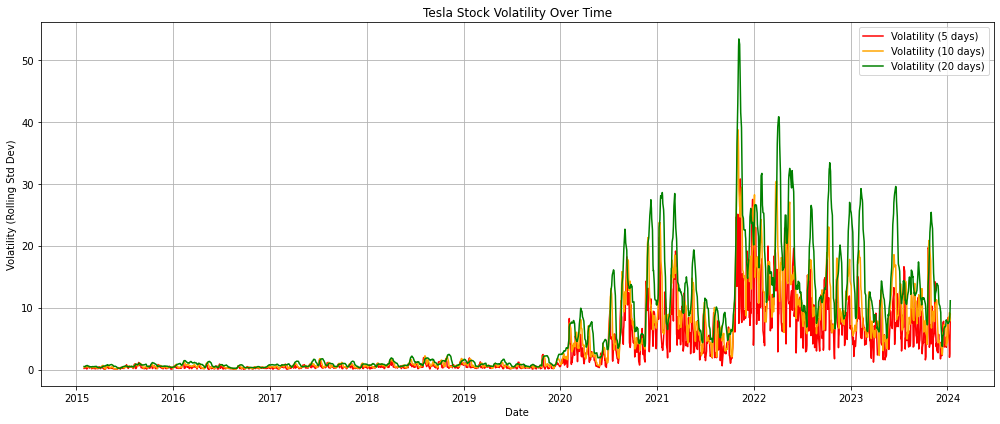

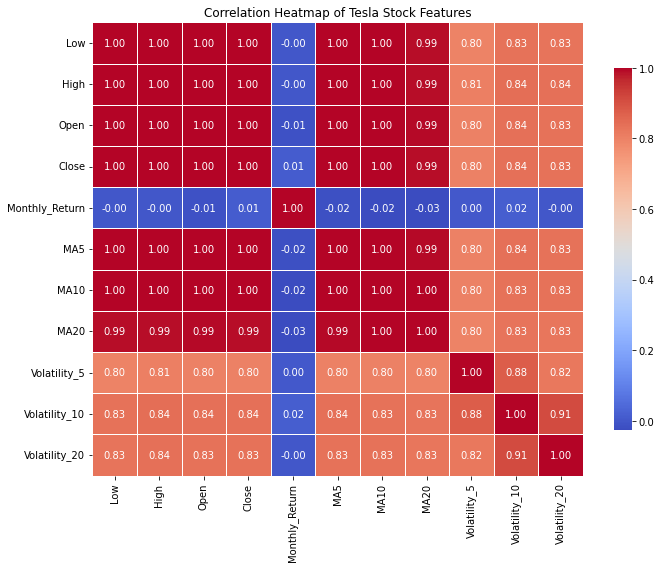

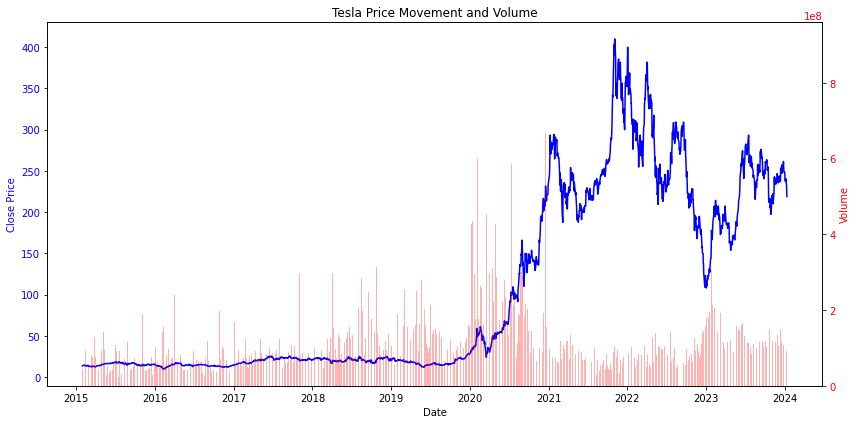

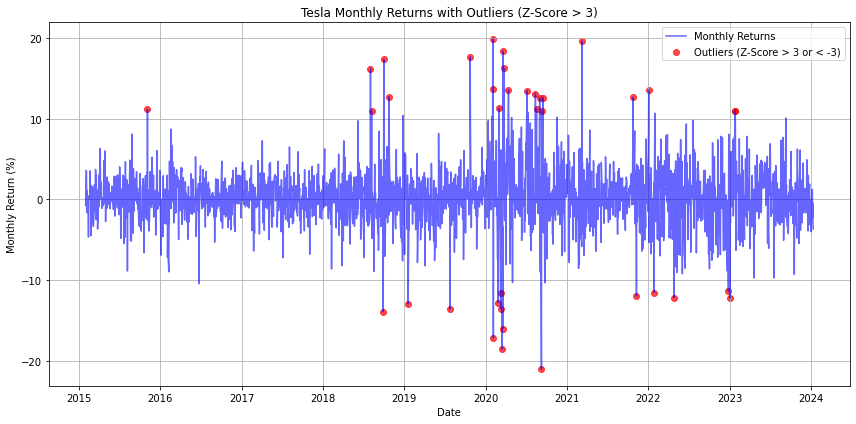

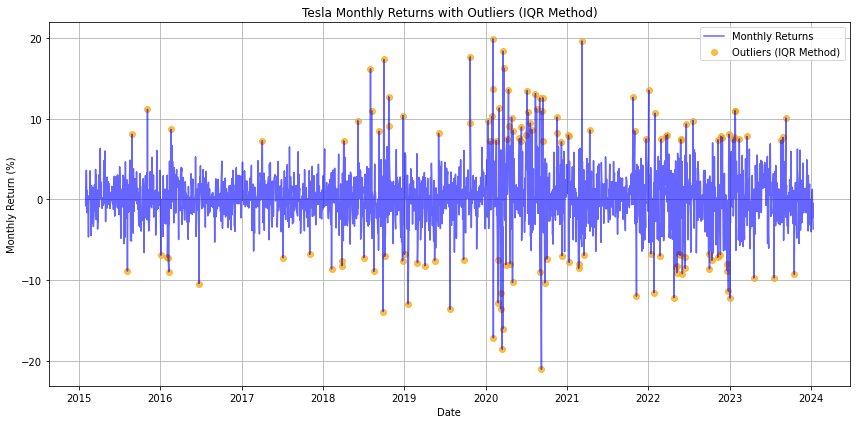

Sharpe Ratio: 0.0519


/Users/rakibabdullah/Desktop/Tesla-S/EDA.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative_Return'] = (1 + df['Daily_Return'] / 100).cumprod() - 1
/Users/rakibabdullah/Desktop/Tesla-S/EDA.py:155: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').last()


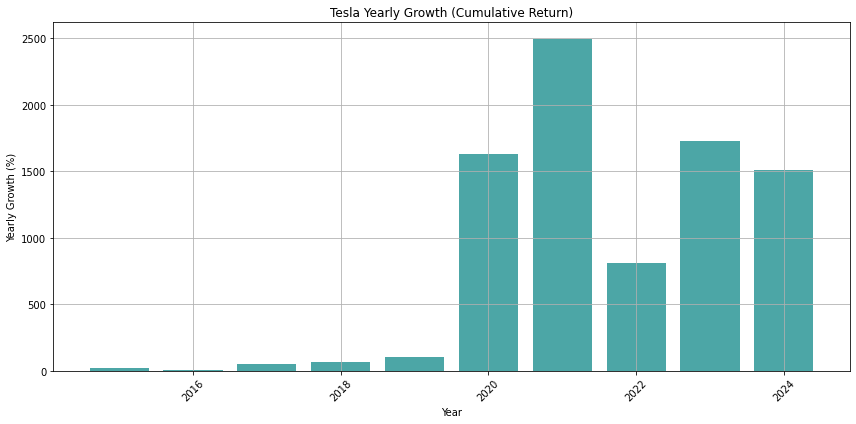

In [17]:
plot_monthly_return_distribution(df_full)
plot_stock_price_trend(df_full)
plot_moving_averages(df_full)
plot_weekly_avg_return(df_full)
plot_quarterly_seasonality(df_full)
plot_volatility(df_full)
plot_correlation_heatmap(df_full)
plot_volume_vs_price(df_full)
plot_zscore_outliers(df_full)
plot_iqr_outliers(df_full)
calculate_sharpe_ratio(df_full)
plot_cumulative_returns(df_full)



# Model Tranining an Testing

### SMA

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0123
Mean Squared Error (MSE): 0.0002
Root Mean Squared Error (RMSE): 0.0157
R-squared (R²): 0.9807
Mean Absolute Percentage Error (MAPE): 2.3518%




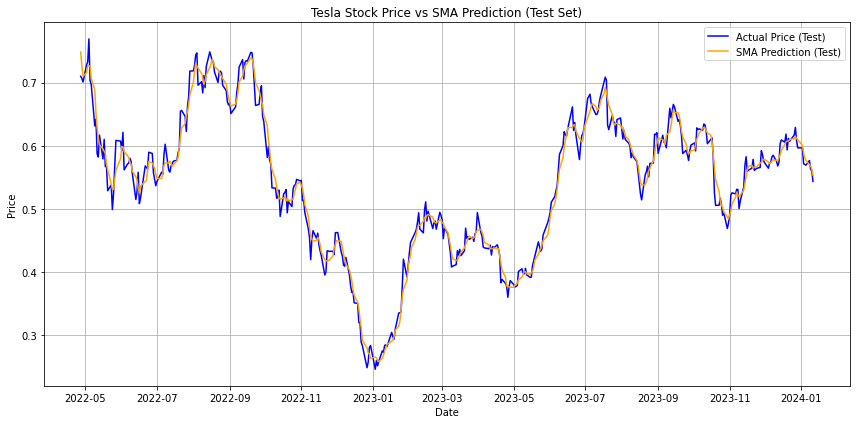

In [18]:
# Apply Simple Moving Average (SMA) to the test set
df_test_scaled['SMA_Prediction'] = simple_moving_average_model(df_test_scaled, window=5)

df_test_scaled.dropna(inplace=True)

evaluate_model(df_test_scaled['Close'], df_test_scaled['SMA_Prediction'])
plot_simple_moving_average(df_test_scaled)

### Linear Regression

In [19]:
y_test, y_pred = linear_regression_model(df_train_scaled, df_test_scaled)

evaluate_model(y_test, y_pred)  

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0153
Mean Squared Error (MSE): 0.0004
Root Mean Squared Error (RMSE): 0.0204
R-squared (R²): 0.9674
Mean Absolute Percentage Error (MAPE): 2.9296%




### XGBoost

In [20]:
y_test, y_pred= xgboost_model(df_train_scaled, df_test_scaled)
evaluate_model(y_test, y_pred)

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0217
Mean Squared Error (MSE): 0.0008
Root Mean Squared Error (RMSE): 0.0278
R-squared (R²): 0.9397
Mean Absolute Percentage Error (MAPE): 4.2362%




## RandomForestRegressor

In [21]:
y_test, y_pred = random_forest_model(df_train_scaled, df_test_scaled)

evaluate_model(y_test, y_pred) 

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0209
Mean Squared Error (MSE): 0.0007
Root Mean Squared Error (RMSE): 0.0270
R-squared (R²): 0.9432
Mean Absolute Percentage Error (MAPE): 4.2403%




## SVR

In [22]:
y_test, y_pred = svr_model(df_train_scaled, df_test_scaled)

evaluate_model(y_test, y_pred) 

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0208
Mean Squared Error (MSE): 0.0007
Root Mean Squared Error (RMSE): 0.0261
R-squared (R²): 0.9466
Mean Absolute Percentage Error (MAPE): 4.1836%




## DT regressor

In [23]:
y_test, y_pred = decision_tree_model(df_train_scaled, df_test_scaled)

evaluate_model(y_test, y_pred) 

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0299
Mean Squared Error (MSE): 0.0014
Root Mean Squared Error (RMSE): 0.0377
R-squared (R²): 0.8889
Mean Absolute Percentage Error (MAPE): 5.6928%




## LSTM

In [24]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')


In [25]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU


In [26]:
from Models import *

Reloading Tuner from hyperparameter_tuning/lstm_hyperparameter_tuning/tuner0.json
Best hyperparameters: {'lstm_units_1': 150, 'dropout_1': 0.2, 'lstm_units_2': 200, 'dropout_2': 0.1, 'dense_units': 64, 'learning_rate': 0.00033612834408703365}
Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0027 - root_mean_squared_error: 0.0512 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0528
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.6081e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0539
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.2370e-04 - root_mean_squared_error: 0.0110 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0562
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.3968e-04 - root_mean_squared_error: 0.0118 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0509
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.0814e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0515
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.1149e-04 - root_mean_squared_error: 0.0105 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0518
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/ste

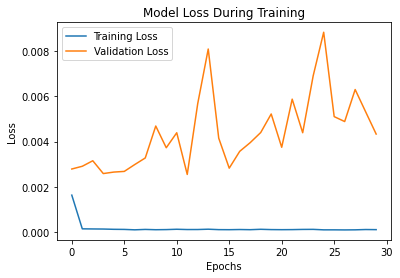

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0354
Mean Squared Error (MSE): 0.0020
Root Mean Squared Error (RMSE): 0.0443
R-squared (R²): 0.8433
Mean Absolute Percentage Error (MAPE): 23.9282%




In [27]:
y_test, y_pred = lstm_model(df_train_scaled, df_test_scaled)

evaluate_model(y_test, y_pred) 

In [28]:
y_test, y_pred = gru_model(df_train_scaled, df_test_scaled)

evaluate_model(y_test, y_pred)



Reloading Tuner from hyperparameter_tuning_gru/gru_hyperparameter_tuning/tuner0.json
Best hyperparameters: {'gru_units_1': 150, 'dropout_1': 0.1, 'gru_units_2': 200, 'dropout_2': 0.1, 'gru_units_3': 150, 'dense_units': 96, 'dropout_3': 0.5, 'learning_rate': 8.327414044844959e-05}
Epoch 1/64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0022 - root_mean_squared_error: 0.0443 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 2/64
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4.5531e-04 - root_mean_squared_error: 0.0212 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0769
Epoch 3/64
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2.8833e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0493
Epoch 4/64
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.7032e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0733
Epoch 5/64
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.7010e-04 - root_mean_squared_error: 0.0191 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0504
Epoch 6/64
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.4686e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546
Epoch 7/64
180/180 ━━━━━━━━━━━━━━━━━━